In [1]:
from one.api import ONE
from brainbox.io.one import SessionLoader, SpikeSortingLoader
from brainbox.singlecell import bin_spikes
from iblatlas.atlas import AllenAtlas
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

C:\Users\elsha\anaconda3\envs\ibl\Lib\site-packages\one\alf\files.py:10: FutureWarning: `one.alf.files` will be removed in version 3.0. Use `one.alf.path` instead.
  warnings.warn(


In [2]:
ba = AllenAtlas()
one = ONE()

In [24]:
pid_matrix = pd.DataFrame(columns = ['Primary Motor Cortex (MOp)', 'Secondary Motor Cortex (MOs)', 
                                     'Superior Collicilus (SC)', 'Striatum (STR)'])
pid_matrix['Primary Motor Cortex (MOp)'] = ['73ff4936-8cd3-4a75-a772-f563e67d249d', 'f475ae14-9415-453e-b800-1480ea1c868d', 
                                            '7b05cccc-44f6-4491-a0ea-e38d6e95513d', 'decc8d40-cf74-4263-ae9d-a0cc68b47e86',
                                           '2564dc27-4eda-4fc3-a151-c13475796ee1', 'df07180e-268e-489c-826e-40cb6f63d3a5',
                                           '2d2cdf86-4a0c-42d8-aed3-5b187f160013', '79628a45-c2e3-4206-97df-4c91edaff90f',
                                           '7bd5627e-b02e-47f1-b476-4bf8eaa726b3', '3bd1f88b-4e0c-43a6-9483-3305e82f2fae']

pid_matrix['Secondary Motor Cortex (MOs)'] = ['298e2a70-9801-45f0-b91c-d6bb9718427e', '99993a2b-588e-4c0c-bfec-e3dfb4f61534',
                                             '450cea3b-9289-4708-9df2-a2518bdc4b59', '2564dc27-4eda-4fc3-a151-c13475796ee1',
                                             'ae2b9f1b-ebe3-4b56-8957-31982186e6ec', '5458cb27-d065-4626-bcd8-1aa775e1115e',
                                             '26af22bb-b295-4a45-8ed3-1700604c0708', '45e7731f-4a43-45d5-9029-c080150bc596',
                                             '898f8971-31e9-4fdb-b66e-2ae6d3a33a5b', 'c1014051-d06b-4f85-9887-e7c42a94baf2']

pid_matrix['Superior Collicilus (SC)'] = ['c893c0a3-5597-49cf-baa1-60efdfdef542', 'b7c57ce1-a75b-410a-94b6-8abee5a92c4f',
                                         'e7080659-8319-48a6-b6fd-2e8ce8eeec49', 'fe41986d-4966-4a77-af7e-e7f71c25aec5',
                                         '00a824c0-e060-495f-9ebc-79c82fef4c67', '7791ee46-5c13-4d1b-8518-5602dcb8666b',
                                         '53ecbf4f-e0d8-4fe6-a852-8b934a37a1c2', '9150758e-1390-41d1-b426-96675e60dbea',
                                         'ca5404f7-297c-40f1-bbf0-5ac0a63e24f8', 'e4ce2e94-6fb9-4afe-acbf-6f5a3498602e']

pid_matrix['Striatum (STR)'] = ['73ff4936-8cd3-4a75-a772-f563e67d249d', 'f475ae14-9415-453e-b800-1480ea1c868d',
                                'c4b5a9fa-10cb-4195-9c17-15b6a1f77f9a', '45c49ba2-a113-4446-9c6d-9b049c1f9f74',
                               'fd555d39-b728-44aa-90d2-796b8bb58300', '45e7731f-4a43-45d5-9029-c080150bc596',
                               '6a22a5b4-79ec-4b3c-b023-1ec7b4a2b675', 'adca9242-0725-41d4-8eb1-5655a464431d',
                               '19c9caea-2df8-4097-92f8-0a2bad055948', 'd3deaed9-34b7-41da-bd62-961750cb9ca0']

In [25]:
pid_matrix

,Primary Motor Cortex (MOp),Secondary Motor Cortex (MOs),Superior Collicilus (SC),Striatum (STR)
0,73ff4936-8cd3-4a75-a772-f563e67d249d,298e2a70-9801-45f0-b91c-d6bb9718427e,c893c0a3-5597-49cf-baa1-60efdfdef542,73ff4936-8cd3-4a75-a772-f563e67d249d
1,f475ae14-9415-453e-b800-1480ea1c868d,99993a2b-588e-4c0c-bfec-e3dfb4f61534,b7c57ce1-a75b-410a-94b6-8abee5a92c4f,f475ae14-9415-453e-b800-1480ea1c868d
2,7b05cccc-44f6-4491-a0ea-e38d6e95513d,450cea3b-9289-4708-9df2-a2518bdc4b59,e7080659-8319-48a6-b6fd-2e8ce8eeec49,c4b5a9fa-10cb-4195-9c17-15b6a1f77f9a
3,decc8d40-cf74-4263-ae9d-a0cc68b47e86,2564dc27-4eda-4fc3-a151-c13475796ee1,fe41986d-4966-4a77-af7e-e7f71c25aec5,45c49ba2-a113-4446-9c6d-9b049c1f9f74
4,2564dc27-4eda-4fc3-a151-c13475796ee1,ae2b9f1b-ebe3-4b56-8957-31982186e6ec,00a824c0-e060-495f-9ebc-79c82fef4c67,fd555d39-b728-44aa-90d2-796b8bb58300
5,df07180e-268e-489c-826e-40cb6f63d3a5,5458cb27-d065-4626-bcd8-1aa775e1115e,7791ee46-5c13-4d1b-8518-5602dcb8666b,45e7731f-4a43-45d5-9029-c080150bc596
6,2d2cdf86-4a0c-42d8-aed3-5b187f160013,26af22bb-b295-4a45-8ed3-1700604c0708,53ecbf4f-e0d8-4fe6-a852-8b934a37a1c2,6a22a5b4-79ec-4b3c-b023-1ec7b4a2b675
7,79628a45-c2e3-4206-97df-4c91edaff90f,45e7731f-4a43-45d5-9029-c080150bc596,9150758e-1390-41d1-b426-96675e60dbea,adca9242-0725-41d4-8eb1-5655a464431d
8,7bd5627e-b02e-47f1-b476-4bf8eaa726b3,898f8971-31e9-4fdb-b66e-2ae6d3a33a5b,ca5404f7-297c-40f1-bbf0-5ac0a63e24f8,19c9caea-2df8-4097-92f8-0a2bad055948
9,3bd1f88b-4e0c-43a6-9483-3305e82f2fae,c1014051-d06b-4f85-9887-e7c42a94baf2,e4ce2e94-6fb9-4afe-acbf-6f5a3498602e,d3deaed9-34b7-41da-bd62-961750cb9ca0


In [23]:
pid = pid_matrix['Primary Motor Cortex (MOp)'][0]
eid, _ = one.pid2eid(pid)
sl = SessionLoader(eid=eid, one=one)
sl.load_trials()
ssl = SpikeSortingLoader(one=one, pid=pid, atlas=ba)
spikes, clusters, channels = ssl.load_spike_sorting()
clusters = ssl.merge_clusters(spikes, clusters, channels)

(S3) C:\Users\elsha\Downloads\ONE\openalyx.internationalbrainlab.org\angelakilab\Subjects\NYU-21\2020-08-19\001\alf\_ib
(S3) C:\Users\elsha\Downloads\ONE\openalyx.internationalbrainlab.org\angelakilab\Subjects\NYU-21\2020-08-19\001\alf\_ib
(S3) C:\Users\elsha\Downloads\ONE\openalyx.internationalbrainlab.org\angelakilab\Subjects\NYU-21\2020-08-19\001\alf\_ib
(S3) C:\Users\elsha\Downloads\ONE\openalyx.internationalbrainlab.org\angelakilab\Subjects\NYU-21\2020-08-19\001\alf\pro
(S3) C:\Users\elsha\Downloads\ONE\openalyx.internationalbrainlab.org\angelakilab\Subjects\NYU-21\2020-08-19\001\alf\pro
(S3) C:\Users\elsha\Downloads\ONE\openalyx.internationalbrainlab.org\angelakilab\Subjects\NYU-21\2020-08-19\001\alf\pro
(S3) C:\Users\elsha\Downloads\ONE\openalyx.internationalbrainlab.org\angelakilab\Subjects\NYU-21\2020-08-19\001\alf\pro
(S3) C:\Users\elsha\Downloads\ONE\openalyx.internationalbrainlab.org\angelakilab\Subjects\NYU-21\2020-08-19\001\alf\pro
(S3) C:\Users\elsha\Downloads\ONE\openal

Handpick sessions from different brain regions (Superior Colliculus, Primary/Secondary motor, Striatum).
Create loop that goes through each cluster in both probes
Use cluster to align event across trials and create PSTH 
Find clusters and sessions that match the PSTHs that show sensitive clusters (depending on different events[stim onset, movement onset, reward])

In [26]:
bin_size = 1
pre_time = 2
post_time = 3
stimulus_events = np.array(sl.trials['stimOn_times'])
movement_events = np.array(sl.trials['firstMovement_times'])
reward_events = np.array(sl.trials['feedback_times'])

In [27]:
session_region_acronym = clusters['acronym'].astype(str)
cluster_ids = np.where(clusters['label'] == 1 & np.char.startswith(session_region_acronym, 'MOp'))[0]
cluster_ids

array([ 11,  69, 147, 163, 172, 177, 178, 196, 206, 257])

cluster #11


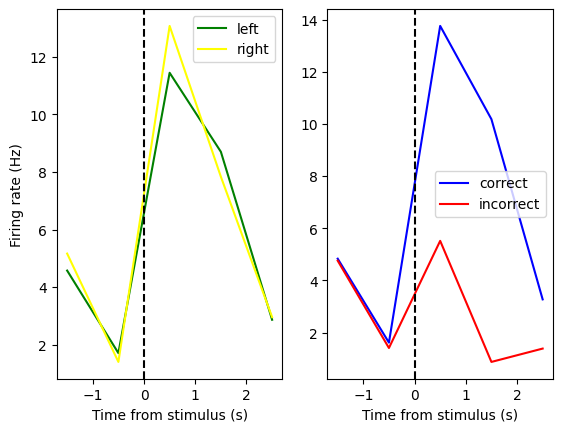

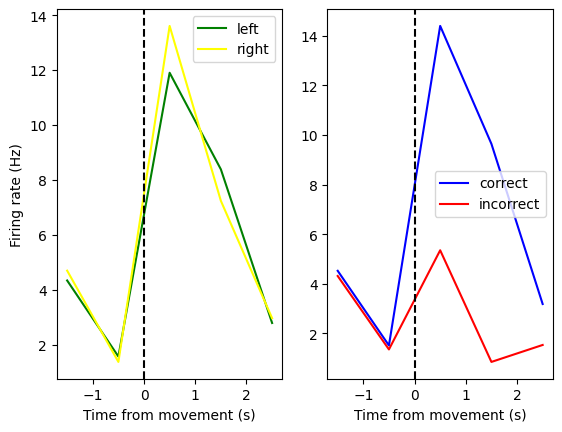

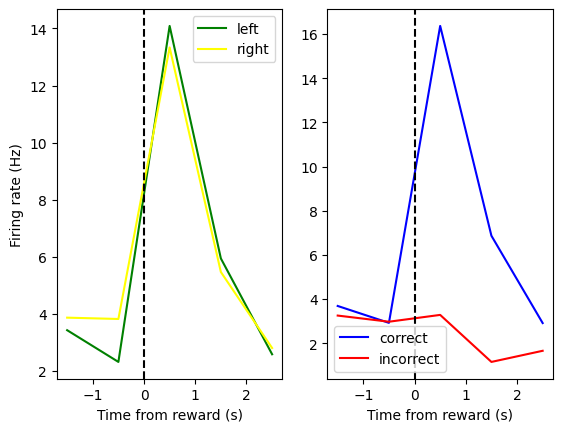

cluster #69


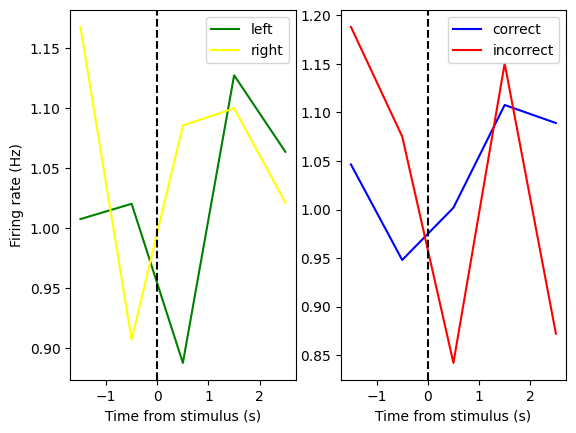

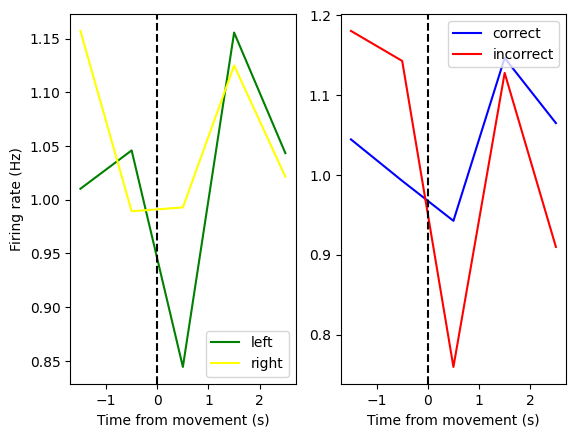

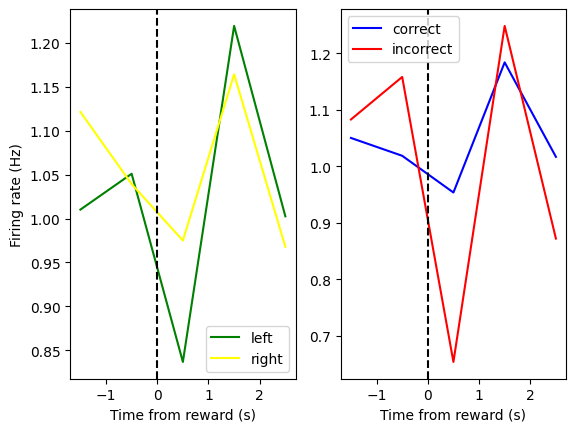

cluster #147


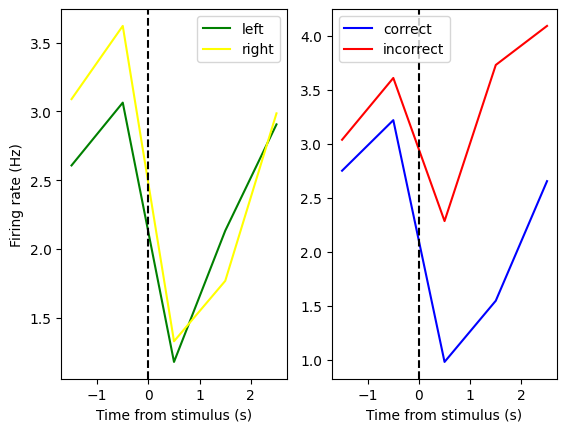

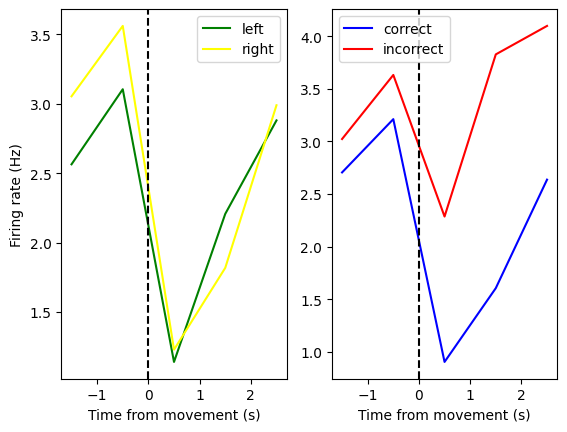

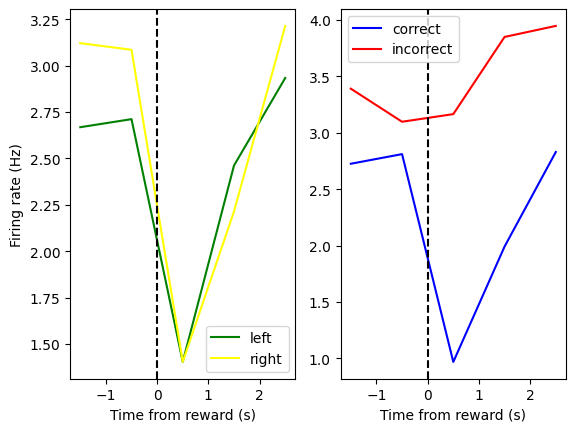

cluster #163


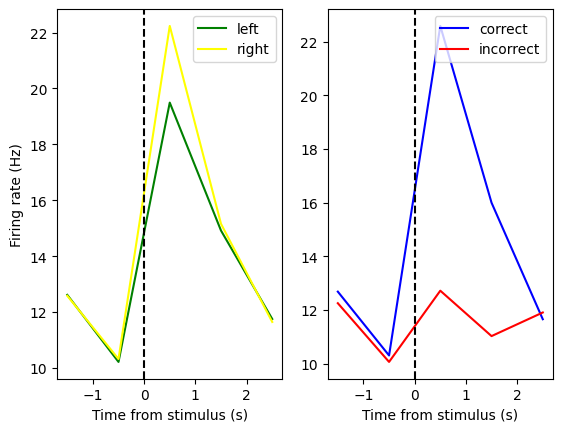

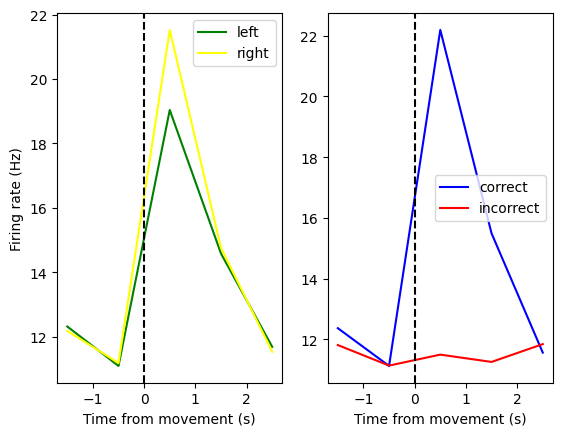

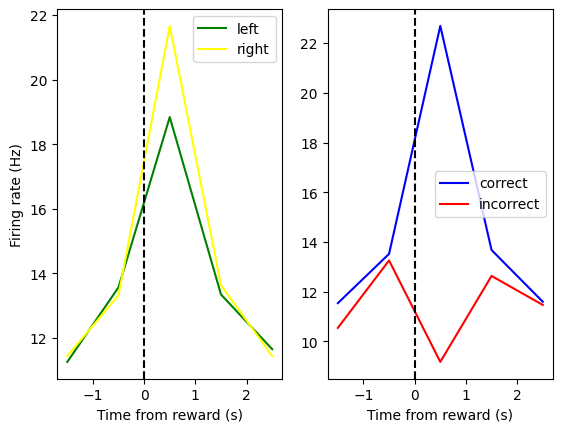

cluster #172


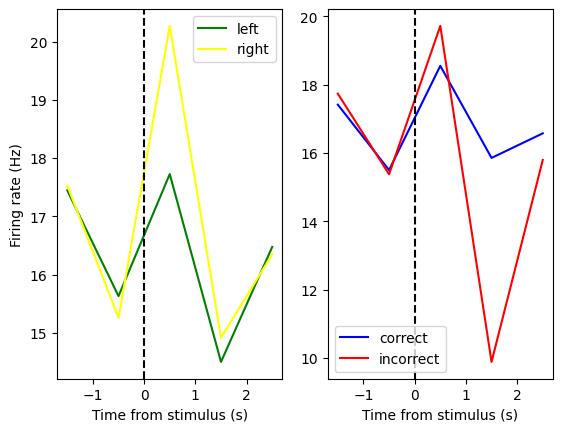

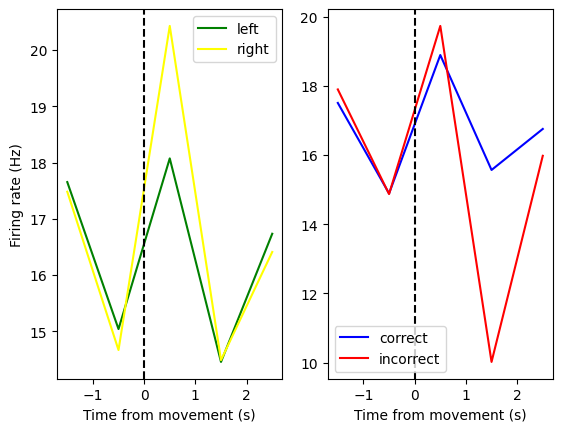

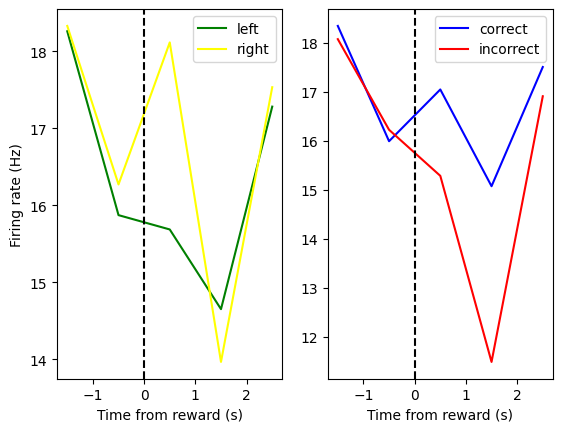

cluster #177


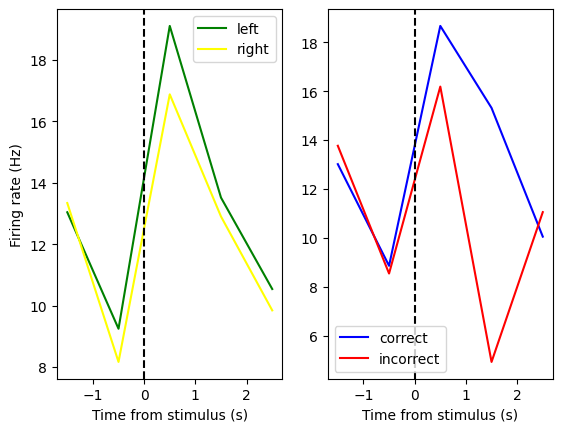

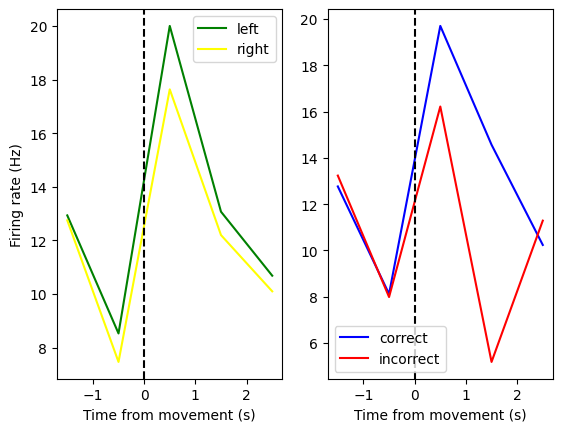

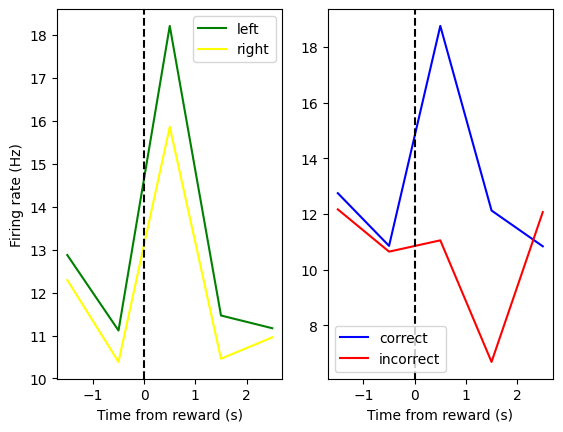

cluster #178


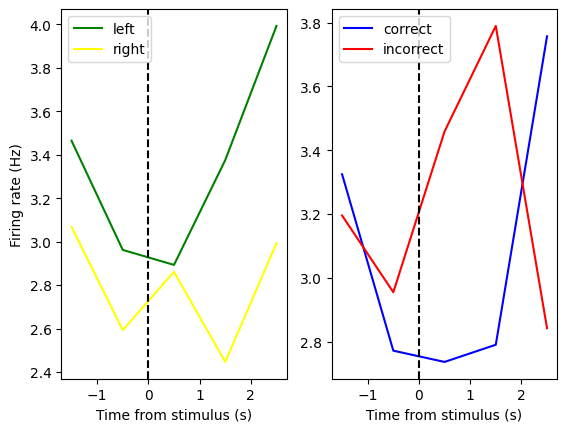

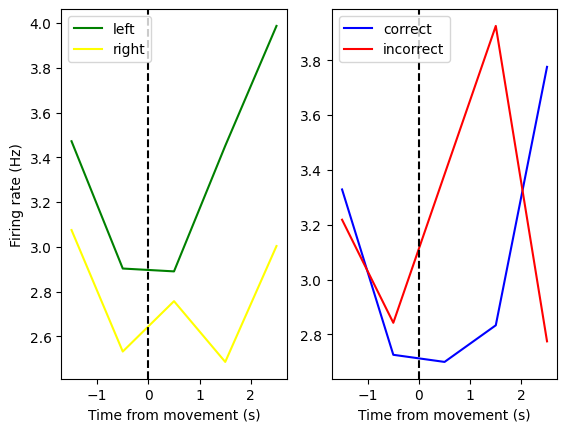

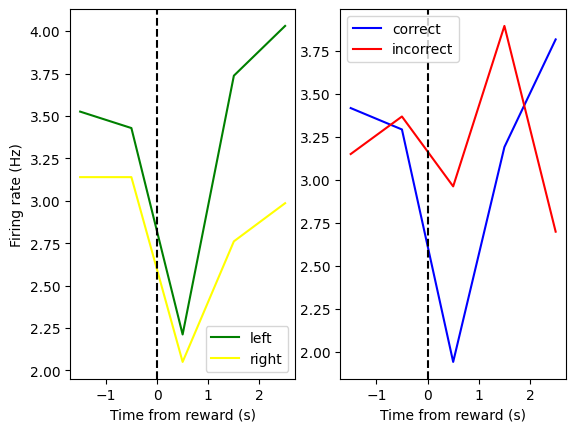

cluster #196


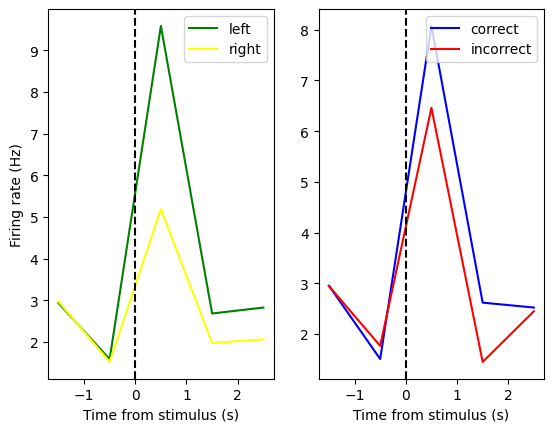

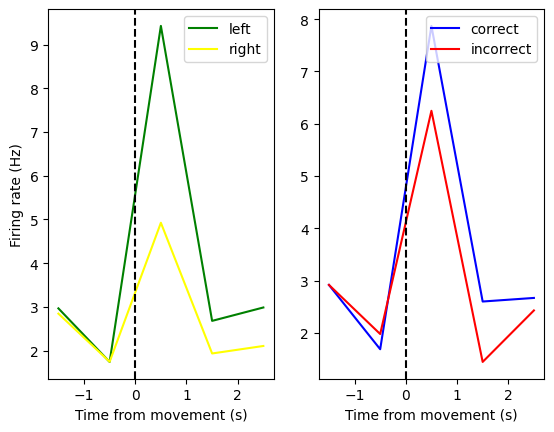

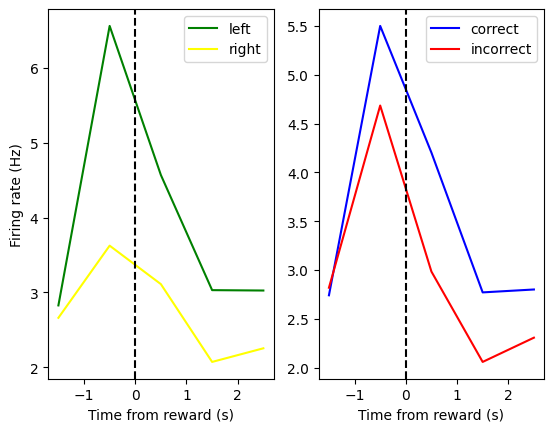

cluster #206


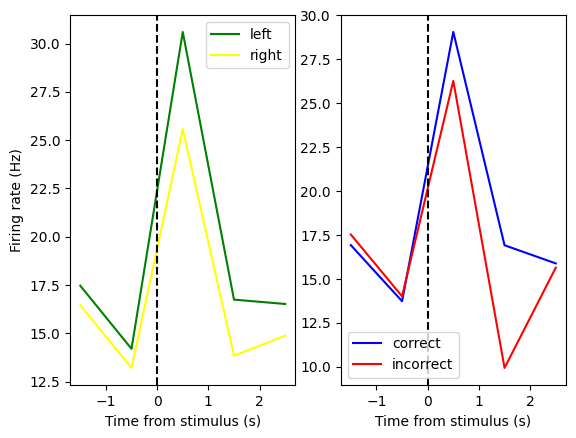

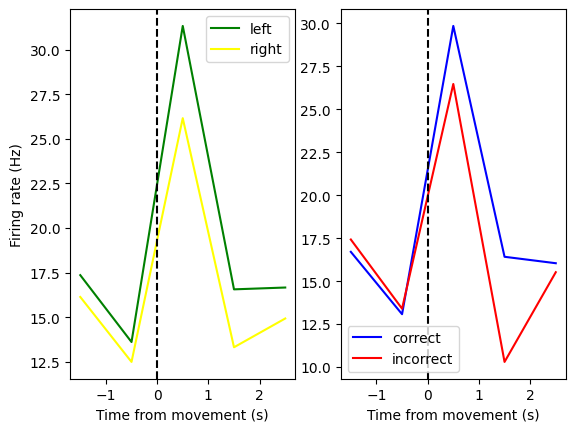

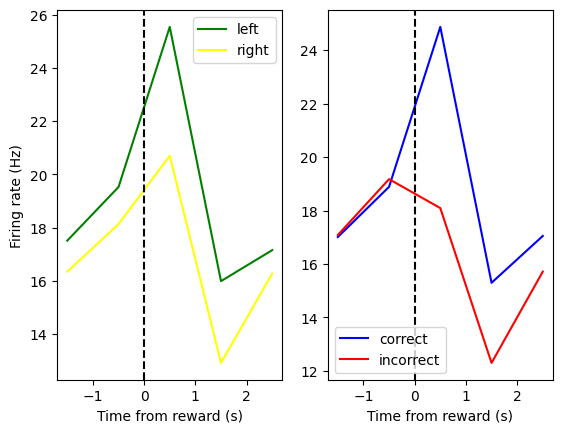

cluster #257


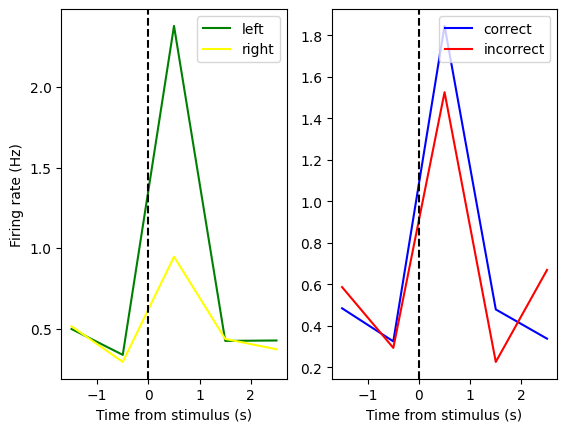

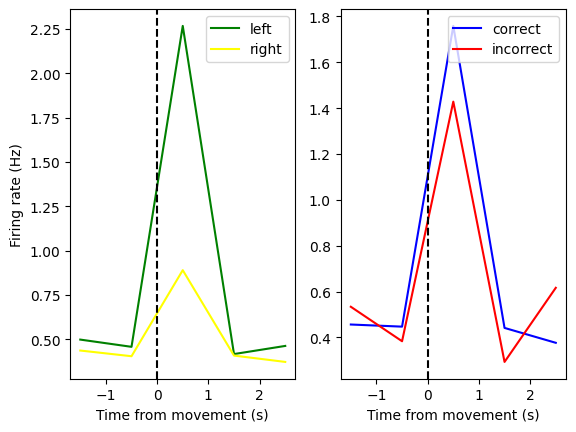

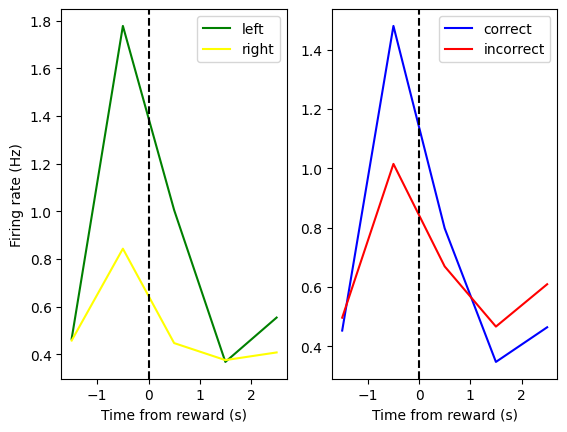

In [28]:
for cluster in cluster_ids:
    spikes_idx = (spikes['clusters'] == cluster)
    spike_times = spikes.times[spikes_idx]
    
    stim_spike_raster, stim_times = bin_spikes(spike_times, stimulus_events, pre_time=pre_time, post_time=post_time, bin_size=bin_size)
    stim_spike_raster = stim_spike_raster / bin_size

    move_spike_raster, move_times = bin_spikes(spike_times, movement_events, pre_time=pre_time, post_time=post_time, bin_size=bin_size)
    move_spike_raster = move_spike_raster / bin_size

    reward_spike_raster, reward_times = bin_spikes(spike_times, reward_events, pre_time=pre_time, post_time=post_time, bin_size=bin_size)
    reward_spike_raster = reward_spike_raster / bin_size

    print(f"cluster #{cluster}")
    # Compute psth for left vs right and correct vs incorrect stimulus trials aligned on stimulus 
    left_idx = ~np.isnan(sl.trials['contrastLeft'])
    right_idx = ~np.isnan(sl.trials['contrastRight'])
    psth_left = np.nanmean(stim_spike_raster[left_idx], axis=0)
    psth_right = np.nanmean(stim_spike_raster[right_idx], axis=0)
    
    correct_idx = sl.trials['feedbackType'] == 1
    incorrect_idx = sl.trials['feedbackType'] == -1
    psth_correct = np.nanmean(stim_spike_raster[correct_idx], axis=0)
    psth_incorrect = np.nanmean(stim_spike_raster[incorrect_idx], axis=0)
    
    fig, axs = plt.subplots(1, 2)
    axs[0].plot(stim_times, psth_left, c='green')
    axs[0].plot(stim_times, psth_right, c='yellow')
    axs[0].legend(['left', 'right'])
    axs[0].axvline(0, c='k', linestyle='--')
    axs[0].set_xlabel('Time from stimulus (s)')
    axs[0].set_ylabel('Firing rate (Hz)')
    
    axs[1].plot(stim_times, psth_correct, c='blue')
    axs[1].plot(stim_times, psth_incorrect, c='red')
    axs[1].legend(['correct', 'incorrect'])
    axs[1].axvline(0, c='k', linestyle='--')
    axs[1].set_xlabel('Time from stimulus (s)')

    plt.show()
    # Compute psth for left vs right and correct vs incorrect stimulus trials aligned on movement
    left_idx = ~np.isnan(sl.trials['contrastLeft'])
    right_idx = ~np.isnan(sl.trials['contrastRight'])
    psth_left = np.nanmean(move_spike_raster[left_idx], axis=0)
    psth_right = np.nanmean(move_spike_raster[right_idx], axis=0)
    
    correct_idx = sl.trials['feedbackType'] == 1
    incorrect_idx = sl.trials['feedbackType'] == -1
    psth_correct = np.nanmean(move_spike_raster[correct_idx], axis=0)
    psth_incorrect = np.nanmean(move_spike_raster[incorrect_idx], axis=0)
    
    fig, axs = plt.subplots(1, 2)
    axs[0].plot(move_times, psth_left, c='green')
    axs[0].plot(move_times, psth_right, c='yellow')
    axs[0].legend(['left', 'right'])
    axs[0].axvline(0, c='k', linestyle='--')
    axs[0].set_xlabel('Time from movement (s)')
    axs[0].set_ylabel('Firing rate (Hz)')
    
    axs[1].plot(move_times, psth_correct, c='blue')
    axs[1].plot(move_times, psth_incorrect, c='red')
    axs[1].legend(['correct', 'incorrect'])
    axs[1].axvline(0, c='k', linestyle='--')
    axs[1].set_xlabel('Time from movement (s)')

    plt.show()
    # Compute psth for left vs right and correct vs incorrect stimulus trials aligned on movement
    left_idx = ~np.isnan(sl.trials['contrastLeft'])
    right_idx = ~np.isnan(sl.trials['contrastRight'])
    psth_left = np.nanmean(reward_spike_raster[left_idx], axis=0)
    psth_right = np.nanmean(reward_spike_raster[right_idx], axis=0)
    
    correct_idx = sl.trials['feedbackType'] == 1
    incorrect_idx = sl.trials['feedbackType'] == -1
    psth_correct = np.nanmean(reward_spike_raster[correct_idx], axis=0)
    psth_incorrect = np.nanmean(reward_spike_raster[incorrect_idx], axis=0)
    
    fig, axs = plt.subplots(1, 2)
    axs[0].plot(reward_times, psth_left, c='green')
    axs[0].plot(reward_times, psth_right, c='yellow')
    axs[0].legend(['left', 'right'])
    axs[0].axvline(0, c='k', linestyle='--')
    axs[0].set_xlabel('Time from reward (s)')
    axs[0].set_ylabel('Firing rate (Hz)')
    
    axs[1].plot(reward_times, psth_correct, c='blue')
    axs[1].plot(reward_times, psth_incorrect, c='red')
    axs[1].legend(['correct', 'incorrect'])
    axs[1].axvline(0, c='k', linestyle='--')
    axs[1].set_xlabel('Time from reward (s)')

    plt.show()

In [29]:
bin_size = 0.05
pre_time = 0.5
post_time = 1

cluster #11


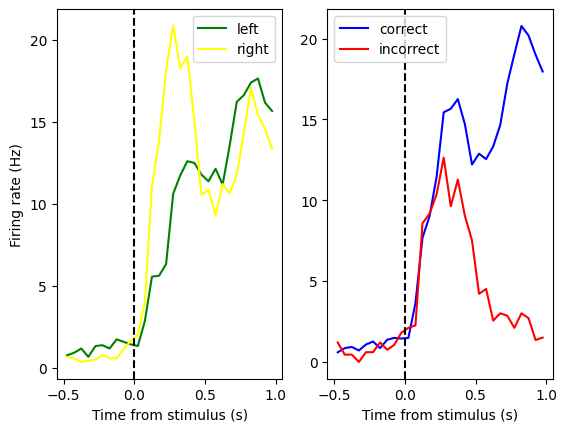

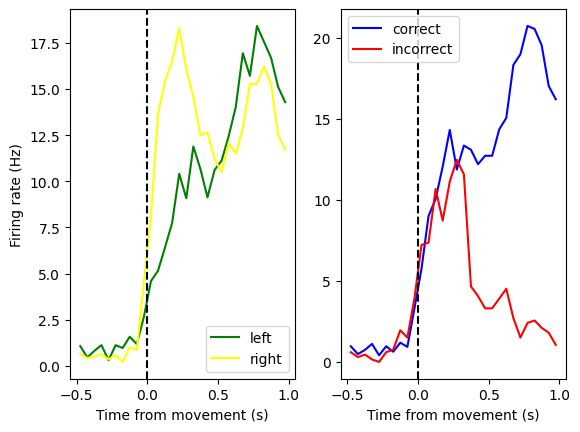

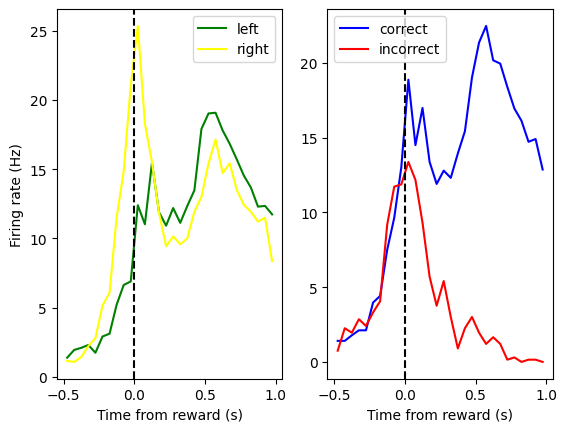

cluster #69


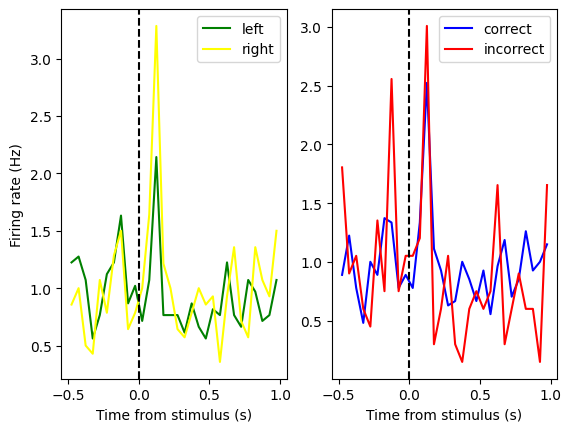

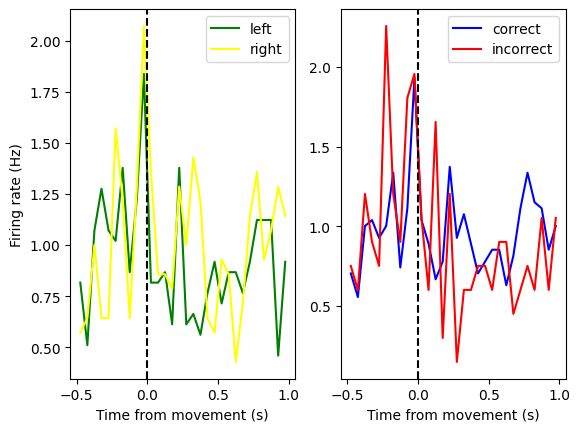

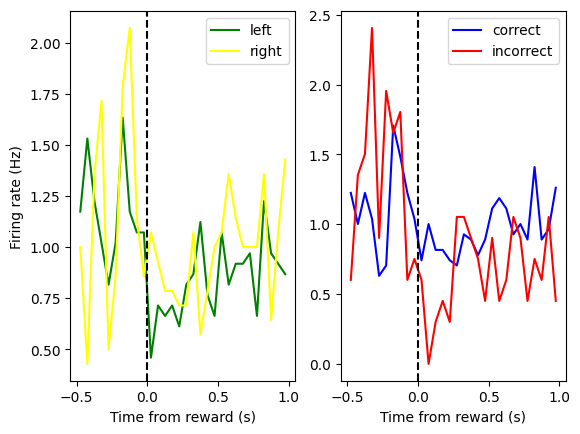

cluster #147


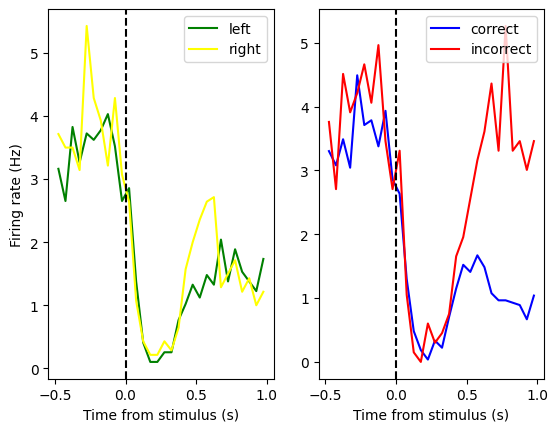

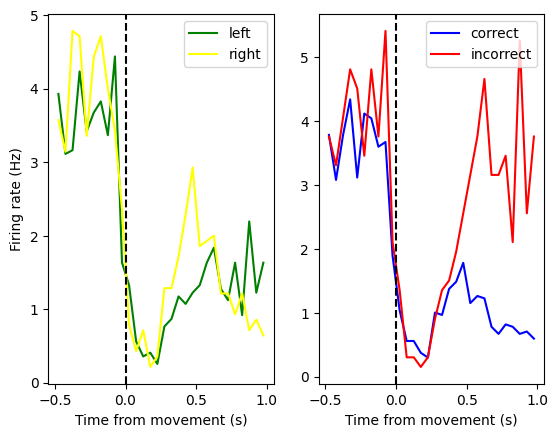

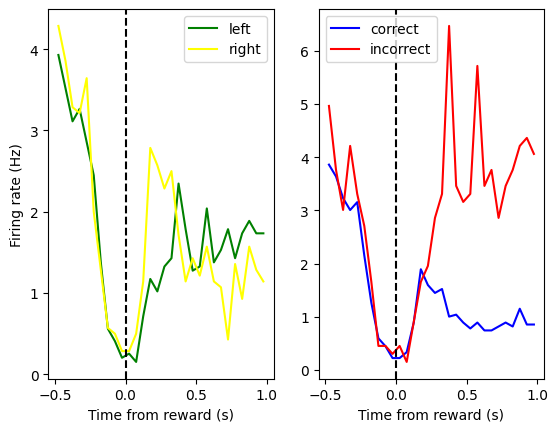

cluster #163


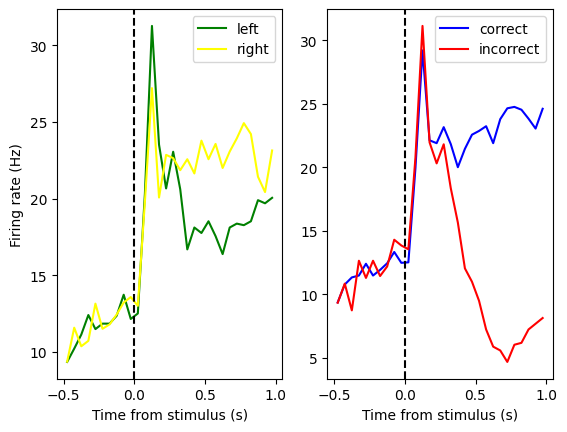

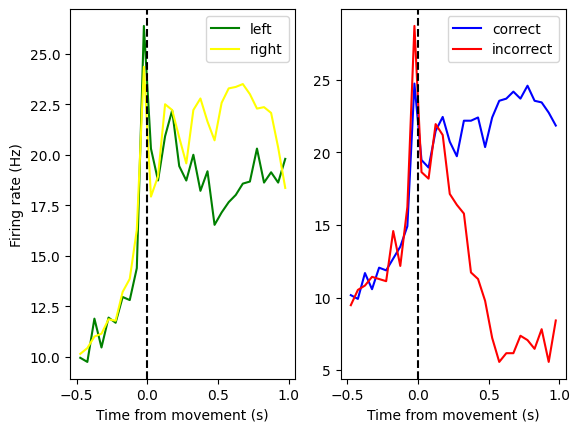

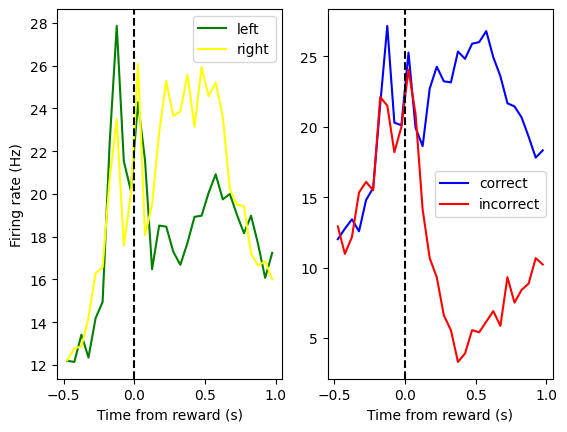

cluster #172


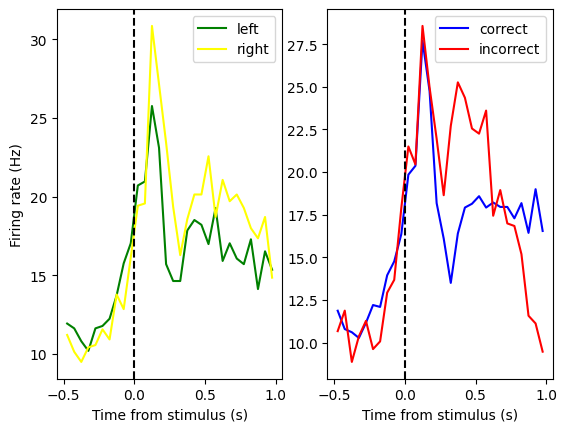

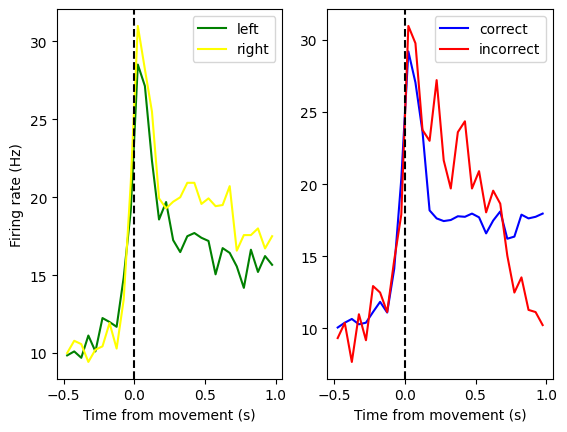

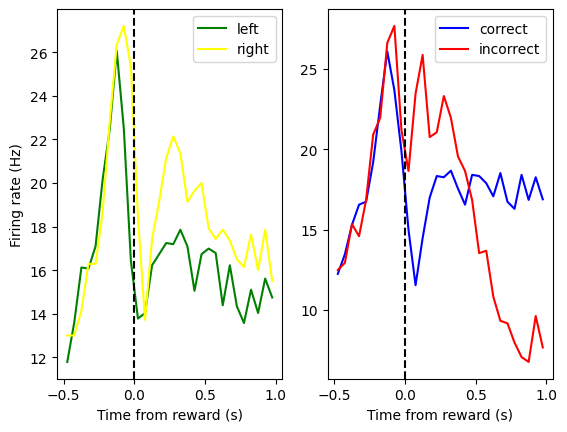

cluster #177


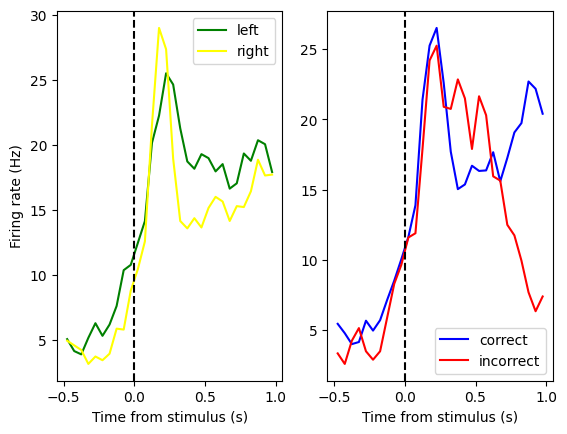

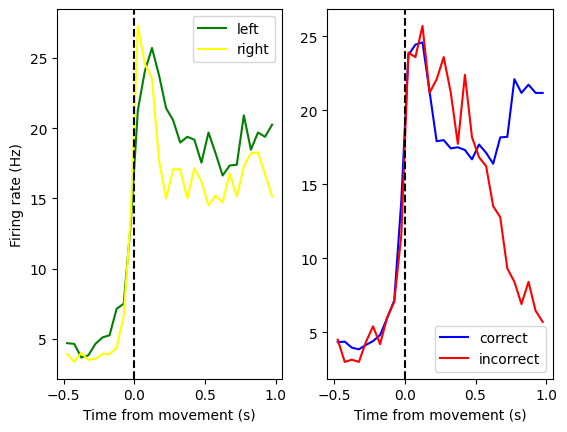

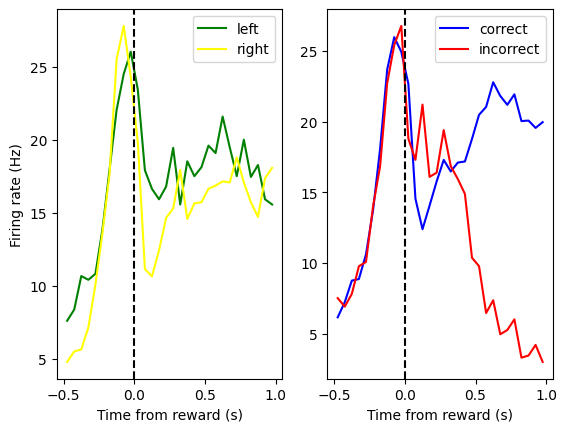

cluster #178


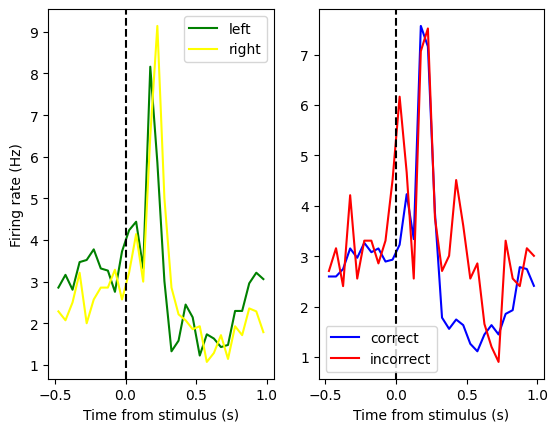

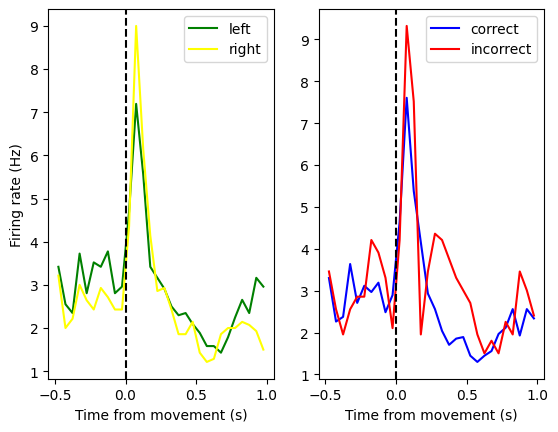

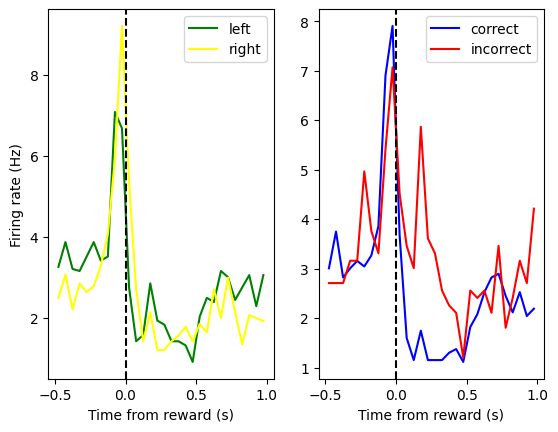

cluster #196


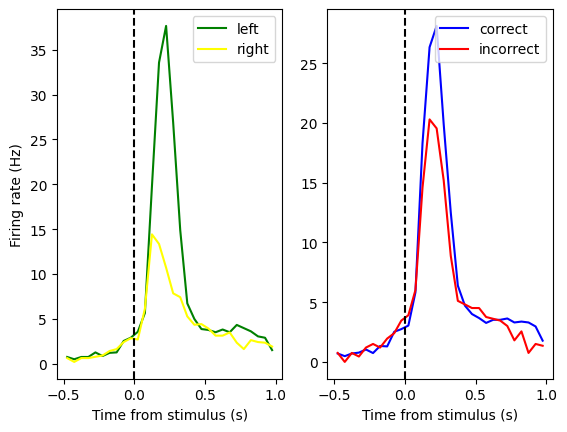

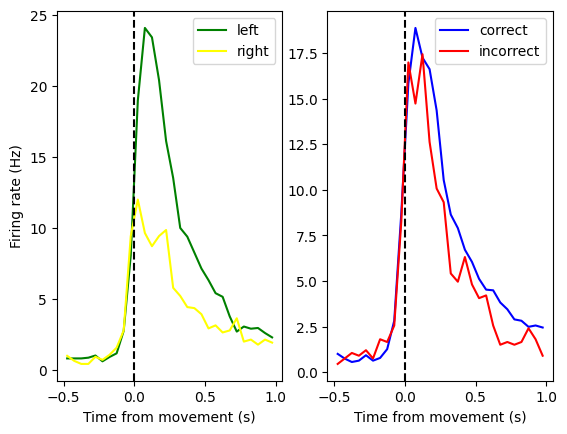

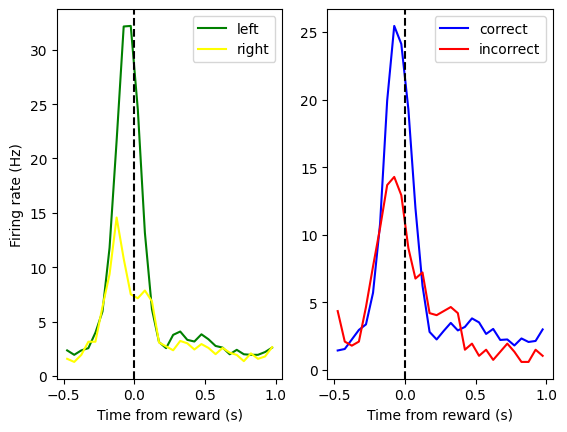

cluster #206


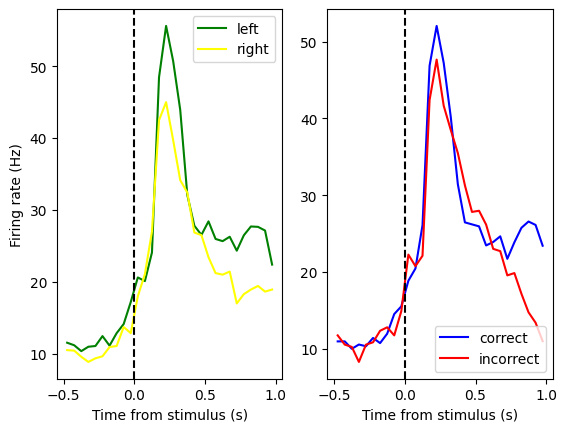

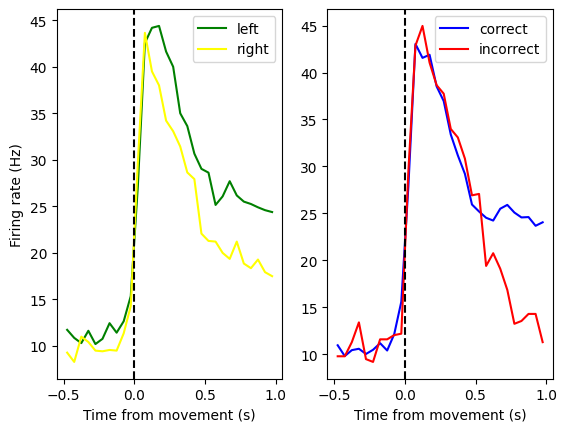

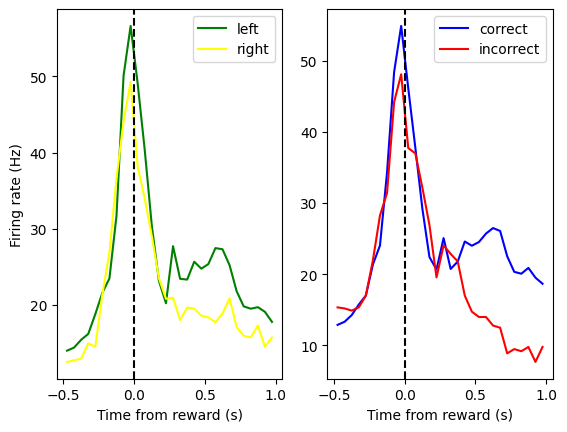

cluster #257


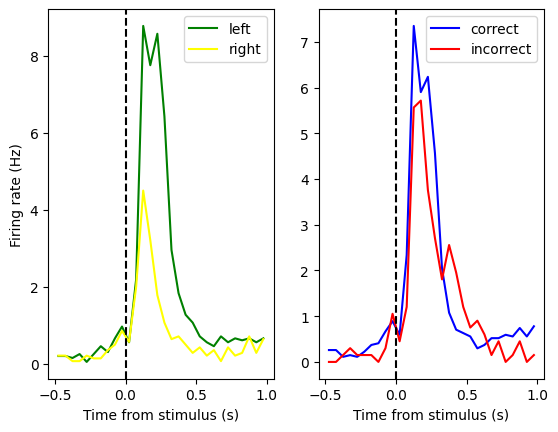

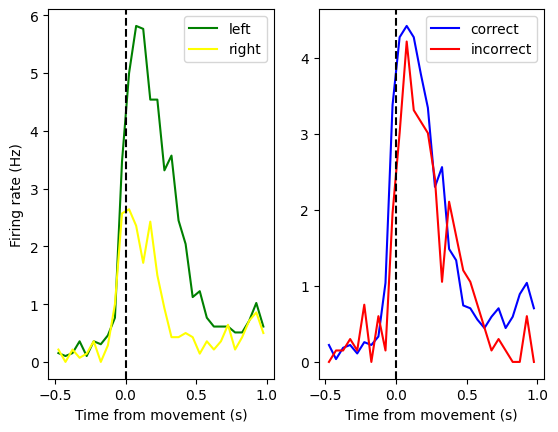

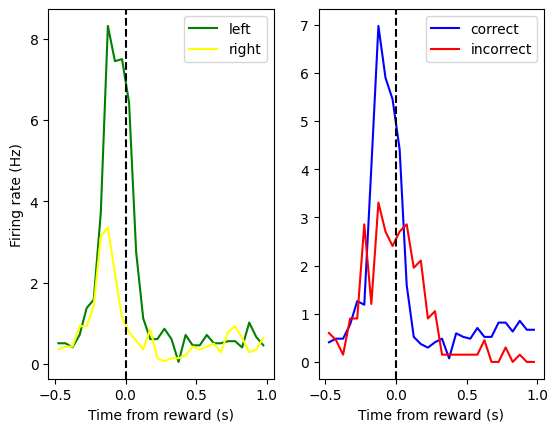

In [30]:
for cluster in cluster_ids:
    spikes_idx = (spikes['clusters'] == cluster)
    spike_times = spikes.times[spikes_idx]
    
    stim_spike_raster, stim_times = bin_spikes(spike_times, stimulus_events, pre_time=pre_time, post_time=post_time, bin_size=bin_size)
    stim_spike_raster = stim_spike_raster / bin_size

    move_spike_raster, move_times = bin_spikes(spike_times, movement_events, pre_time=pre_time, post_time=post_time, bin_size=bin_size)
    move_spike_raster = move_spike_raster / bin_size

    reward_spike_raster, reward_times = bin_spikes(spike_times, reward_events, pre_time=pre_time, post_time=post_time, bin_size=bin_size)
    reward_spike_raster = reward_spike_raster / bin_size

    print(f"cluster #{cluster}")
    # Compute psth for left vs right and correct vs incorrect stimulus trials aligned on stimulus 
    left_idx = ~np.isnan(sl.trials['contrastLeft'])
    right_idx = ~np.isnan(sl.trials['contrastRight'])
    psth_left = np.nanmean(stim_spike_raster[left_idx], axis=0)
    psth_right = np.nanmean(stim_spike_raster[right_idx], axis=0)
    
    correct_idx = sl.trials['feedbackType'] == 1
    incorrect_idx = sl.trials['feedbackType'] == -1
    psth_correct = np.nanmean(stim_spike_raster[correct_idx], axis=0)
    psth_incorrect = np.nanmean(stim_spike_raster[incorrect_idx], axis=0)
    
    fig, axs = plt.subplots(1, 2)
    axs[0].plot(stim_times, psth_left, c='green')
    axs[0].plot(stim_times, psth_right, c='yellow')
    axs[0].legend(['left', 'right'])
    axs[0].axvline(0, c='k', linestyle='--')
    axs[0].set_xlabel('Time from stimulus (s)')
    axs[0].set_ylabel('Firing rate (Hz)')
    
    axs[1].plot(stim_times, psth_correct, c='blue')
    axs[1].plot(stim_times, psth_incorrect, c='red')
    axs[1].legend(['correct', 'incorrect'])
    axs[1].axvline(0, c='k', linestyle='--')
    axs[1].set_xlabel('Time from stimulus (s)')

    plt.show()
    # Compute psth for left vs right and correct vs incorrect stimulus trials aligned on movement
    left_idx = ~np.isnan(sl.trials['contrastLeft'])
    right_idx = ~np.isnan(sl.trials['contrastRight'])
    psth_left = np.nanmean(move_spike_raster[left_idx], axis=0)
    psth_right = np.nanmean(move_spike_raster[right_idx], axis=0)
    
    correct_idx = sl.trials['feedbackType'] == 1
    incorrect_idx = sl.trials['feedbackType'] == -1
    psth_correct = np.nanmean(move_spike_raster[correct_idx], axis=0)
    psth_incorrect = np.nanmean(move_spike_raster[incorrect_idx], axis=0)
    
    fig, axs = plt.subplots(1, 2)
    axs[0].plot(move_times, psth_left, c='green')
    axs[0].plot(move_times, psth_right, c='yellow')
    axs[0].legend(['left', 'right'])
    axs[0].axvline(0, c='k', linestyle='--')
    axs[0].set_xlabel('Time from movement (s)')
    axs[0].set_ylabel('Firing rate (Hz)')
    
    axs[1].plot(move_times, psth_correct, c='blue')
    axs[1].plot(move_times, psth_incorrect, c='red')
    axs[1].legend(['correct', 'incorrect'])
    axs[1].axvline(0, c='k', linestyle='--')
    axs[1].set_xlabel('Time from movement (s)')

    plt.show()
    # Compute psth for left vs right and correct vs incorrect stimulus trials aligned on movement
    left_idx = ~np.isnan(sl.trials['contrastLeft'])
    right_idx = ~np.isnan(sl.trials['contrastRight'])
    psth_left = np.nanmean(reward_spike_raster[left_idx], axis=0)
    psth_right = np.nanmean(reward_spike_raster[right_idx], axis=0)
    
    correct_idx = sl.trials['feedbackType'] == 1
    incorrect_idx = sl.trials['feedbackType'] == -1
    psth_correct = np.nanmean(reward_spike_raster[correct_idx], axis=0)
    psth_incorrect = np.nanmean(reward_spike_raster[incorrect_idx], axis=0)
    
    fig, axs = plt.subplots(1, 2)
    axs[0].plot(reward_times, psth_left, c='green')
    axs[0].plot(reward_times, psth_right, c='yellow')
    axs[0].legend(['left', 'right'])
    axs[0].axvline(0, c='k', linestyle='--')
    axs[0].set_xlabel('Time from reward (s)')
    axs[0].set_ylabel('Firing rate (Hz)')
    
    axs[1].plot(reward_times, psth_correct, c='blue')
    axs[1].plot(reward_times, psth_incorrect, c='red')
    axs[1].legend(['correct', 'incorrect'])
    axs[1].axvline(0, c='k', linestyle='--')
    axs[1].set_xlabel('Time from reward (s)')

    plt.show()